# CNN ( Convolution Neural Network )

Machine Learning algorithm mostly to solve 2D problems like images, etc...

## Create a model ( in this example I use MNIST datasets because its easy to understand, so i can learn the fundamentals before moving on to more advance datasets)

11490434/11490434 [==============================] - 15s 1us/step
Epoch 1/5


I0000 00:00:1753151310.724047     292 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 13s 5ms/step - loss: 0.1416 - accuracy: 0.9572 - val_loss: 0.0424 - val_accuracy: 0.9870
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0461 - accuracy: 0.9855 - val_loss: 0.0365 - val_accuracy: 0.9875
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0325 - val_accuracy: 0.9890
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0232 - accuracy: 0.9924 - val_loss: 0.0340 - val_accuracy: 0.9891
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0278 - accuracy: 0.9902

🎯 Accuracy trên tập test: 99.02%


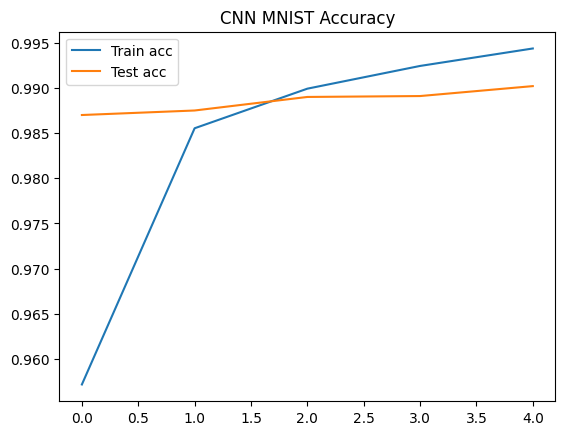

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. Tải dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Chuẩn hóa dữ liệu
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# 3. Xây dựng mô hình CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 lớp tương ứng các chữ số
])

# 4. Compile mô hình
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Huấn luyện
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 6. Đánh giá mô hình
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\n🎯 Accuracy trên tập test: {test_acc*100:.2f}%')

# 7. Vẽ biểu đồ loss và accuracy
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Test acc')
plt.legend()
plt.title('CNN MNIST Accuracy')
plt.show()

## After finishing create and train the model, save it and load to implement on real image that ill  draw :)

In [7]:
from tensorflow.keras.models import load_model

In [25]:
model_h5 = load_model("mnist_cnn_model.h5")
print("done")

done


## Implement into real samples

In [26]:
import numpy as np
sample_image = x_test[0]

In [27]:
input_image = np.expand_dims(sample_image, axis = 0)

In [28]:
input_image.shape

(1, 28, 28, 1)

In [29]:
predictions = model_h5.predict(input_image)

1/1 [==============================] - 0s 127ms/step


In [30]:
predicted_class = np.argmax(predictions)
print(predicted_class)

7


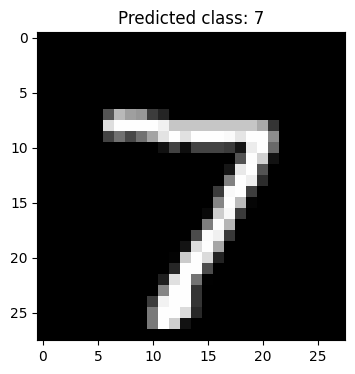

In [33]:
plt.figure(figsize=(4,4))
plt.imshow(sample_image, cmap = "gray")
plt.title(f"Predicted class: {predicted_class}")
plt.show()